In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import time
from IPython.core.display import HTML 
import random 
np.set_printoptions(suppress=True)
random.seed(100)

In [2]:
df = pd.read_csv('RLCW.csv')
df = df.rename(columns = {'Duration': 'Duration in Minutes'})
df.head(20)


,Initial Location,Target stop,initial_ID,Target_ID,Duration in Minutes,Cost,Platform Change
0,CDG,Denfert-Rochereau,0,1,47,10,0
1,CDG,Chatelet - Les Halles,0,2,33,8,0
2,CDG,Saint-Michel-Notre-Dame,0,3,46,10,0
3,CDG,Parc des Expositions RER,0,4,11,4,0
4,Denfert-Rochereau,Bir-Hakeim,1,5,15,10,1
5,Chatelet - Les Halles,Charles de Gaulle - Etoile,2,6,10,8,1
6,Saint-Michel-Notre-Dame,Champ de Mars - Tour Eiffel,3,7,10,10,1
7,Parc des Expositions RER,Saint-Michel-Notre-Dame,4,3,40,12,1
8,Bir-Hakeim,Champ de Mars - Tour Eiffel,5,7,10,0,0
9,Charles de Gaulle - Etoile,bir-Hakeim,6,5,6,8,1


In [3]:
df['Reward'] = 0 # Adding reward Column
platform_weight = 1 #importance of each feature
duration_weight = 1 #importance of each feature
cost_weight = 1 #importance of each feature


for i in range(0,len(df)):
    
    duration_min = df['Duration in Minutes'][i]
    platform_change = df['Platform Change'][i]
    cost = df['Cost'][i]
# reward calculation for journey duration 
    if (duration_min == 0 ):
        duration_reward = 0
    elif (0< duration_min<= 20 ):
        duration_reward = 20
    elif (20< duration_min<= 40 ):
        duration_reward = 15
    elif (40< duration_min<= 60 ):
        duration_reward = 10
    elif (60< duration_min<= 70 ):
        duration_reward = 1
    else:
        duration_reward = -1
    
# reward calculation for platform change
    if (platform_change == 1):
        platform_change_reward = -5
    else:
        platform_change_reward = 0

# reward calculation for cost
    if (cost == 0):
        cost_reward = 0
    elif (0<cost<=5):
        cost_reward = 10
    elif (5<cost<=9):
        cost_reward = 6   
    elif (9<cost<=12):
        cost_reward = 4
    elif (12<cost<= 16):
        cost_reward = 3
    elif (16<cost<=20):
        cost_reward = 2
    elif (20<cost<=50):
        cost_reward = 1
    else:
        cost_reward = -1
# Calculating total Rewards
    total_reward = duration_weight * duration_reward + platform_weight * \
platform_change_reward + cost_weight*cost_reward

# updating the table
    df['Reward'][i] = total_reward
df

/Users/hesam/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Initial Location,Target stop,initial_ID,Target_ID,Duration in Minutes,Cost,Platform Change,Reward
0,CDG,Denfert-Rochereau,0,1,47,10,0,14
1,CDG,Chatelet - Les Halles,0,2,33,8,0,21
2,CDG,Saint-Michel-Notre-Dame,0,3,46,10,0,14
3,CDG,Parc des Expositions RER,0,4,11,4,0,30
4,Denfert-Rochereau,Bir-Hakeim,1,5,15,10,1,19
5,Chatelet - Les Halles,Charles de Gaulle - Etoile,2,6,10,8,1,21
6,Saint-Michel-Notre-Dame,Champ de Mars - Tour Eiffel,3,7,10,10,1,19
7,Parc des Expositions RER,Saint-Michel-Notre-Dame,4,3,40,12,1,14
8,Bir-Hakeim,Champ de Mars - Tour Eiffel,5,7,10,0,0,20
9,Charles de Gaulle - Etoile,bir-Hakeim,6,5,6,8,1,21


**Reward Matrix**

In [4]:
reward_mat_init = np.zeros(shape=(8, 8))
for i in range(0, len(df)):
    ii = int(df['initial_ID'][i])
    t = int(df['Target_ID'][i])
    reward_mat_init[ii,t] = df['Reward'][i]
reward_mat = reward_mat_init
#adding large reward for final destination
reward_mat[5,7] = reward_mat[5,7]+200
reward_mat[3,7] = reward_mat[3,7]+200
#adding rewards for one step close to final destination 
reward_mat[0,3] = reward_mat[0,3]+20
reward_mat[1,5] = reward_mat[1,5]+20
reward_mat[6,5] = reward_mat[6,5]+20
reward_mat[4,3] = reward_mat[4,3]+20
#Indexing
df_reward = pd.DataFrame(reward_mat_init)
df_reward.columns = ['CDG_airport','Denfert-Rochereau','Chatelet - Les Halles'
                     ,'Saint-Michel-Notre-Dame'
                     ,'Parc des Expositions RER'
                     ,'Bir-Hakeim'
                     ,'Charles de Gaulle - Etoile'
                     ,'Champ de Mars - Tour Eiffel'
]
#indexing
df_reward.rename (
    index ={
        0: 'CDG_airport',
        1: 'Denfert-Rochereau',
        2: 'Chatelet - Les Halles',
        3: 'Saint-Michel-Notre-Dame',
        4: 'Parc des Expositions RER',
        5: 'Bir-Hakeim',
        6: 'Charles de Gaulle - Etoile',
        7: 'Champ de Mars - Tour Eiffel',
    },
    inplace = True)
df_reward



,CDG_airport,Denfert-Rochereau,Chatelet - Les Halles,Saint-Michel-Notre-Dame,Parc des Expositions RER,Bir-Hakeim,Charles de Gaulle - Etoile,Champ de Mars - Tour Eiffel
CDG_airport,0.0,14.0,21.0,34.0,30.0,0.0,0.0,0.0
Denfert-Rochereau,0.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0
Chatelet - Les Halles,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0
Saint-Michel-Notre-Dame,0.0,0.0,0.0,0.0,0.0,0.0,0.0,219.0
Parc des Expositions RER,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0
Bir-Hakeim,0.0,0.0,0.0,0.0,0.0,0.0,0.0,220.0
Charles de Gaulle - Etoile,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0
Champ de Mars - Tour Eiffel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
def exploreExploit(epsilon):
    # e = 1 = Explore & e = 0 = Exploit 
    random_num = round(10 * random.uniform(0,1)) #random numbers from 0 to 1
    epsilon = epsilon * 10
    if random_num <= epsilon:
        return 1
    return 0
####-----------------------------------
def Episodefunc (convergence, currentState, Qmatrix_old, Qmatrix_new,
                greedy_epsilon, learning_rate, discount_factor):
    stateCount = 0
    episodePolicy = [currentState]
    episodeQ_value = 0
    exploreList = []
    targetState = 0
    # the agent has not reached the final destination
    while targetState < 7:
    # Next destination from current state
    # random Explore or Exploit
        explore = exploreExploit(greedy_epsilon)
        exploreList.append(explore)
        if (explore == 1):
            targetAvailable = df[df['initial_ID'] == currentState]
            target_list = targetAvailable['Target_ID']
            targetList = target_list.tolist()
        # random selection for next target
            id_destination = random.choice(targetList)
            targetState = id_destination
        #EXPLOITATION : select a target which has the maximum Q value
        else:
            #possible target available
            targetAvailable = df[df['initial_ID'] == currentState]
            target_list = targetAvailable['Target_ID']
            target_list = target_list.tolist()
 # For each possible target that is available from the current state, carry out a greedy search
 # for the target with the highest known reward (greedy target).
 # Method: sequentially compare the learned reward of each possible move, storing the higher of the two rewards. 
            Qvalue_max = 0 #initial
            greedy_target = 0 #initial
            targetTemp = []
            Qvalue_max_temp = []
            for t, target in enumerate(target_list):
                Qvalue_max_temp.append(Qmatrix_old[currentState,target])
                targetTemp.append(t)
                
            Qvalue_max = max(Qvalue_max_temp)
            greedyTarget_idx = Qvalue_max_temp.index(max(Qvalue_max_temp))
            greedy_target = target_list[greedyTarget_idx]
            #we want the target with the highest reward
            targetState = greedy_target
        episodePolicy.append(targetState) #adding selected target destination to episode policy
        #------------------->
        # NEW Q value and UPDATE Q matrix
        Qold = Qmatrix_old[currentState, targetState] #old Q value
        currentState_reward = reward_mat[currentState,targetState]
        # searching for possible next targets given the chosen target
        targetAvailable = df[df['initial_ID'] == targetState]
        target_list = targetAvailable['Target_ID']
        targetOfTargetList = target_list.tolist()
        #Calculate maximum cumaltive reward from chosen target to next state
        Qtemp = np.zeros(shape = (len(targetOfTargetList),1))
        for i in range(0,len(targetOfTargetList)):
            Qtemp[i] = Qmatrix_old[targetState,i]
        Qmax = max(Qtemp)
        #updating Q with Bellman equation ----->
        Qnew = Qold + learning_rate *((currentState_reward+ (discount_factor * Qmax))- Qold)
        Qnew_round = np.round(Qnew, decimals = 4)
        Qnew = Qnew_round
        #Update new Q matrix
        Qmatrix_new[currentState,targetState] = Qnew
        #Add
        episodeQ_value += Qnew
        # Set Conditions for Next Episode
        #--------------------->
        currentState = targetState
        #check if the agent reached the final target and stop the learning episode
        if (targetState == 7):
            convergence = 1
        else:
            convergence = 0
        Qold = Qnew
            
    return episodeQ_value[0]
    

In [6]:
def variableReset():
    Qmatrix_old = np.zeros(shape = (8,8))
    Qmatrix_new = np.zeros(shape = (8,8))
    #initial Location (CDG)
    startLocation = 0
    currentState = startLocation
    algorithm_convergence = 0 #not converged Q is altering
    convergence = 0 #episode convergence (not reached the destination)
    episode = 0
    return(Qmatrix_old,Qmatrix_new,startLocation,currentState,
         algorithm_convergence,convergence, episode)
    

## Parameters testing using Constant decay Factor

In [38]:
greedy_epsilon = 1 #explore
greedy_epsilon_rate = 0.2
learning_rate = 0.5
discount_factor = 0.5
convergence_param = 15 #converged if old and new Q stayed the same after 15 episodes
episodeQ_store = [] #store episode rewards
maximumEpisode_count = 200
test_samples = 40
#---------Reseting Variables---------->
[Qmatrix_old,Qmatrix_new,startLocation,currentState,algorithm_convergence,
convergence,episode] = variableReset()
convergenceEpisode = 0
convergenceEpisode_temp = 0
convergenceEpisode_store = []
rewardMatrix_learning = [0]*reward_mat
Qmatrix_new_sum_store = []
first = True

while episode <= maximumEpisode_count-1:
    episodeQvalue_trial_store = []
    for t in range(1,test_samples+1):
        episodeQ_value = Episodefunc(convergence, currentState, Qmatrix_old, Qmatrix_new,greedy_epsilon, learning_rate, discount_factor)
        episodeQvalue_trial_store.append(episodeQ_value)
    episodeQvalue_mean = np.mean(episodeQvalue_trial_store)
    Qmatrix_new_sum_store.append(round(np.sum(Qmatrix_new),1))
    #-----Update Q score for the episode---->
    episodeQ_store.append(episodeQvalue_mean)
    episodemax_Q = max(episodeQ_store)
    #----Reduce epsilon by the rate
    greedy_epsilon = greedy_epsilon * (1-greedy_epsilon_rate)
    if greedy_epsilon < 0:
        greedy_epsilon = 0
    #----All the psooible paths were explored---->
    if np.count_nonzero(reward_mat) == np.count_nonzero(Qmatrix_old):
        if np.array_equiv(np.round(Qmatrix_new,decimals = 4), np.round(Qmatrix_old, decimals = 4)):
            convergenceEpisode_temp = episode
            convergenceEpisode_store.append(convergenceEpisode_temp)
        else:  #----checking the Q matrix is equal to previous episode---->
            convergenceEpisode_store.append(0)
    else:
        convergenceEpisode_store.append(0)
    #---- Update Old Q with the new one for next iteration---->
    np.copyto(Qmatrix_old,Qmatrix_new)
    episode +=1
    if episode>= convergence_param:
        if Qmatrix_new_sum_store[episode-1] == Qmatrix_new_sum_store[episode-convergence_param]:
            if first == True:
                convergenceEpisode = episode-convergence_param
                
                print('The Agent converged in %d episodes' %convergenceEpisode)
                first = False
    else:
        convergenceEpisode = 0         
            

The Agent converged in 17 episodes


In [39]:
#---- Learned Q matrix in dataframe ---->
df_Qmatrix_learned = pd.DataFrame(Qmatrix_new)
df_Qmatrix_learned.columns = ['CDG_airport','Denfert-Rochereau','Chatelet - Les Halles'
                     ,'Saint-Michel-Notre-Dame'
                     ,'Parc des Expositions RER'
                     ,'Bir-Hakeim'
                     ,'Charles de Gaulle - Etoile'
                     ,'Champ de Mars - Tour Eiffel']

df_Qmatrix_learned.rename(
        index ={
        0: 'CDG_airport',
        1: 'Denfert-Rochereau',
        2: 'Chatelet - Les Halles',
        3: 'Saint-Michel-Notre-Dame',
        4: 'Parc des Expositions RER',
        5: 'Bir-Hakeim',
        6: 'Charles de Gaulle - Etoile',
        7: 'Champ de Mars - Tour Eiffel',
    },
    inplace = True)

df_Qmatrix_learned.round(1)



,CDG_airport,Denfert-Rochereau,Chatelet - Les Halles,Saint-Michel-Notre-Dame,Parc des Expositions RER,Bir-Hakeim,Charles de Gaulle - Etoile,Champ de Mars - Tour Eiffel
CDG_airport,0.0,14.0,21.0,34.0,30.0,0.0,0.0,0.0
Denfert-Rochereau,0.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0
Chatelet - Les Halles,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0
Saint-Michel-Notre-Dame,0.0,0.0,0.0,0.0,0.0,0.0,0.0,219.0
Parc des Expositions RER,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0
Bir-Hakeim,0.0,0.0,0.0,0.0,0.0,0.0,0.0,220.0
Charles de Gaulle - Etoile,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0
Champ de Mars - Tour Eiffel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


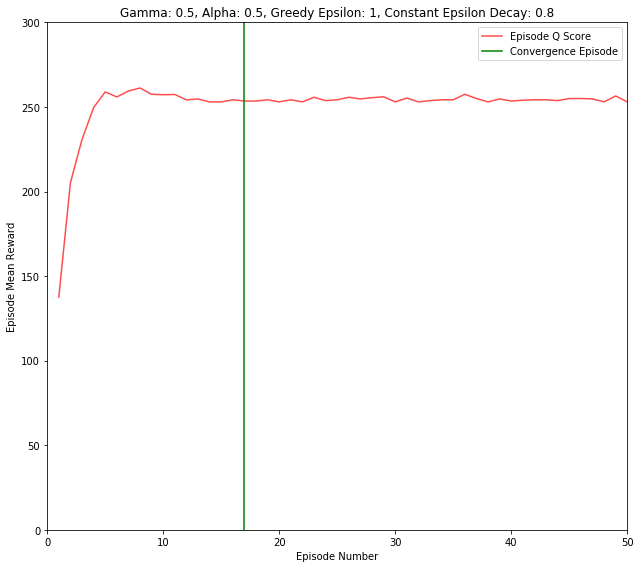

In [40]:
plt.figure(figsize=(9,8))
Xepisodes = np.linspace(1, maximumEpisode_count, maximumEpisode_count, endpoint=True)
conv_points_y = np.linspace(0, 400, 400, endpoint=True)
conv_points_x = [convergenceEpisode] * 400 

Qline = plt.plot(Xepisodes, episodeQ_store, alpha=0.7,color = 'red' ,linewidth=1.5, label = 'Episode Q Score')
conv_line = plt.plot(conv_points_x, conv_points_y, color='green', label = 'Convergence Episode')
plt.legend()
plt.title("Gamma: 0.5, Alpha: 0.5, Greedy Epsilon: 1, Constant Epsilon Decay: 0.8")
plt.ylim(0,300)
plt.xlim(0,50)
plt.xlabel('Episode Number')
plt.ylabel('Episode Mean Reward')

plt.tight_layout()
plt.show()

## Parameters testing by adjusting decay Factor

In [41]:
greedy_epsilon = 1
greedy_epsilon_rate = 0.05
greedy_epsilon_rateExploit = 0.5 #exploiting
#------------------->
learning_rate = 0.5
discount_factor = 1
#------------------->
convergence_param = 15 #converged if old and new Q stayed the same after 15 episodes
episodeQ_store = [] #store episode rewards
maximumEpisode_count = 200
test_samples = 40
#---------Reseting Variables---------->
[Qmatrix_old,Qmatrix_new,startLocation,currentState,algorithm_convergence,
convergence,episode] = variableReset()
convergenceEpisode = 0
convergenceEpisode_temp = 0
convergenceEpisode_store = []
rewardMatrix_learning = [0]*reward_mat
Qmatrix_new_sum_store = []
first = True

while episode <= maximumEpisode_count-1:
    episodeQvalue_trial_store = []
    for t in range(1,test_samples+1):
        episodeQ_value = Episodefunc(convergence, currentState, Qmatrix_old, Qmatrix_new,greedy_epsilon, learning_rate, discount_factor)
        episodeQvalue_trial_store.append(episodeQ_value)
    episodeQvalue_mean = np.mean(episodeQvalue_trial_store)
    Qmatrix_new_sum_store.append(round(np.sum(Qmatrix_new),1))
    #-----Update Q score for the episode---->
    
    episodeQ_store.append(episodeQvalue_mean)
    episodemax_Q = max(episodeQ_store)
    
    #----If in exploration Phase---->
    if convergenceEpisode ==0:
        greedy_epsilon = greedy_epsilon *(1-greedy_epsilon_rate)
    else:
        greedy_epsilon = greedy_epsilon* (1-greedy_epsilon_rateExploit)
    #----------------->
    if greedy_epsilon < 0:
        greedy_epsilon = 0
    
    #----All the psooible paths were explored---->
    if np.count_nonzero(reward_mat) == np.count_nonzero(Qmatrix_old):
        if np.array_equiv(np.round(Qmatrix_new,decimals = 4), np.round(Qmatrix_old, decimals = 4)):
            convergenceEpisode_temp = episode
            convergenceEpisode_store.append(convergenceEpisode_temp)
        else:  #----checking the Q matrix is equal to previous episode---->
            convergenceEpisode_store.append(0)
    else:
        convergenceEpisode_store.append(0)
    #---- Update Old Q with the new one for next iteration---->
    np.copyto(Qmatrix_old,Qmatrix_new)
    episode +=1
    if episode>= convergence_param:
        if Qmatrix_new_sum_store[episode-1] == Qmatrix_new_sum_store[episode-convergence_param]:
            if first == True:
                convergenceEpisode = episode-convergence_param
                
                print('The Agent converged in %d episodes' %convergenceEpisode)
                first = False
    else:
        convergenceEpisode = 0         
            

The Agent converged in 13 episodes


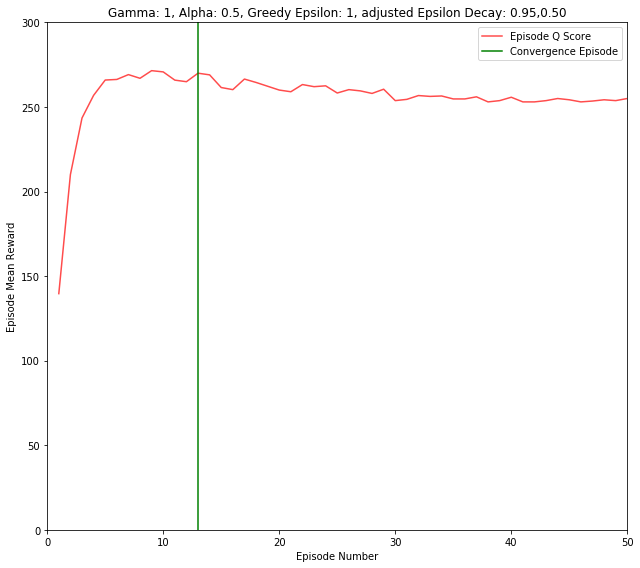

In [42]:
plt.figure(figsize=(9,8))
Xepisodes = np.linspace(1, maximumEpisode_count, maximumEpisode_count, endpoint=True)
conv_points_y = np.linspace(0, 400, 400, endpoint=True)
conv_points_x = [convergenceEpisode] * 400 

Qline = plt.plot(Xepisodes, episodeQ_store, alpha=0.7,color = 'red' ,linewidth=1.5, label = 'Episode Q Score')
conv_line = plt.plot(conv_points_x, conv_points_y, color='green', label = 'Convergence Episode')
plt.legend()
plt.title('Gamma: 1, Alpha: 0.5, Greedy Epsilon: 1, adjusted Epsilon Decay: 0.95,0.50')
plt.ylim(0,300)
plt.xlim(0,50)
plt.xlabel('Episode Number')
plt.ylabel('Episode Mean Reward')

plt.tight_layout()
plt.show()

**Greedy Policy (Epsilon) and constant decay factor Grid Search**

In [43]:
learning_rate = 0.5
discount_factor = 0.5
#---- Grid Search for Policy
epsilonDecay_rangeSize = 5
epsilonDecay_range = np.linspace(0,epsilonDecay_rangeSize,epsilonDecay_rangeSize)
minimumExplore_factor = 0
convergence_param = 15
#----Array for number of episode---->
covergenceCount_np = np.zeros(shape = (epsilonDecay_rangeSize**2,3))
#----Array for Q-scores until convergence--->
Qscore_np = [[[] for j in range(epsilonDecay_rangeSize)] for i in range(epsilonDecay_rangeSize)]
#-------->
episodeCount = []
e = 0
maximumEpisode_count = 200
#----Grid Search---->
for epsilon_loop in epsilonDecay_range:
    d = 0
    for epsilon_loop_rate in epsilonDecay_range:
        greedy_epsilon_rate = epsilon_loop_rate/(epsilonDecay_rangeSize*10)
        greedy_epsilon = epsilon_loop/epsilonDecay_rangeSize
        [Qmatrix_old,Qmatrix_new,startLocation,currentState,algorithm_convergence,
convergence,episode] = variableReset()
        rewardMatrix_learning = [0]*reward_mat
        convergenceEpisode = 0
        convergenceEpisode_store = []
        Qmatrix_new_sum_store = []
        first = True
        episodeQ_store = []
        print('Testing Epsilon',greedy_epsilon, 'Decay Factor is',(1-greedy_epsilon_rate))
        while episode <= maximumEpisode_count-1:
            episodeQvalue_trial_store = []
            for t in range(1,test_samples+1):
                episodeQ_value = Episodefunc(convergence, currentState, Qmatrix_old, Qmatrix_new,greedy_epsilon, learning_rate, discount_factor)
                episodeQvalue_trial_store.append(episodeQ_value)
            episodeQvalue_mean = np.mean(episodeQvalue_trial_store)
            Qmatrix_new_sum_store.append(round(np.sum(Qmatrix_new),1))
    #-----Update Q score for the episode---->
            episodeQ_store.append(episodeQvalue_mean)
            episodemax_Q = max(episodeQ_store)
            greedy_epsilon = greedy_epsilon *(1-greedy_epsilon_rate)
            #----> Same Process
            if greedy_epsilon < 0:
                greedy_epsilon = 0
    
    #----All the psooible paths were explored---->
            if np.count_nonzero(reward_mat) == np.count_nonzero(Qmatrix_old):
                if np.array_equiv(np.round(Qmatrix_new,decimals = 4), np.round(Qmatrix_old, decimals = 4)):
                    convergenceEpisode = episode
                    convergenceEpisode_store.append(convergenceEpisode)
                else:  #----checking the Q matrix is equal to previous episode---->
                    convergenceEpisode_store.append(0)
            else:
                convergenceEpisode_store.append(0)
    #---- Update Old Q with the new one for next iteration---->
            np.copyto(Qmatrix_old,Qmatrix_new)
            episode +=1
            if episode>= convergence_param and episode>=minimumExplore_factor:
                if Qmatrix_new_sum_store[episode-1] == Qmatrix_new_sum_store[episode-convergence_param]:
                    if first == True:
                        convergenceEpisode = episode-convergence_param
                
                        print('The Agent converged in %d episodes' %convergenceEpisode)
                        row = e*(epsilonDecay_rangeSize)+d
                        covergenceCount_np[row][2] = convergenceEpisode
                        first = False
            else:
                convergenceEpisode = 0 
            row = e * (epsilonDecay_rangeSize)+d
            covergenceCount_np[row][0] = epsilon_loop_rate/(epsilonDecay_rangeSize*10)
            covergenceCount_np[row][1] = epsilon_loop_rate/epsilonDecay_rangeSize
            Qscore_np[d][e] = episodeQ_store
        d+=1
    e+=1
            
        
           

Testing Epsilon 0.0 Decay Factor is 1.0
The Agent converged in 24 episodes
Testing Epsilon 0.0 Decay Factor is 0.975
The Agent converged in 34 episodes
Testing Epsilon 0.0 Decay Factor is 0.95
The Agent converged in 27 episodes
Testing Epsilon 0.0 Decay Factor is 0.925
The Agent converged in 41 episodes
Testing Epsilon 0.0 Decay Factor is 0.9
The Agent converged in 27 episodes
Testing Epsilon 0.25 Decay Factor is 1.0
The Agent converged in 13 episodes
Testing Epsilon 0.25 Decay Factor is 0.975
The Agent converged in 14 episodes
Testing Epsilon 0.25 Decay Factor is 0.95
The Agent converged in 15 episodes
Testing Epsilon 0.25 Decay Factor is 0.925
The Agent converged in 29 episodes
Testing Epsilon 0.25 Decay Factor is 0.9
The Agent converged in 25 episodes
Testing Epsilon 0.5 Decay Factor is 1.0
The Agent converged in 13 episodes
Testing Epsilon 0.5 Decay Factor is 0.975
The Agent converged in 13 episodes
Testing Epsilon 0.5 Decay Factor is 0.95
The Agent converged in 13 episodes
Testing

**Visualising the effect of Decay Factor on Reward score**

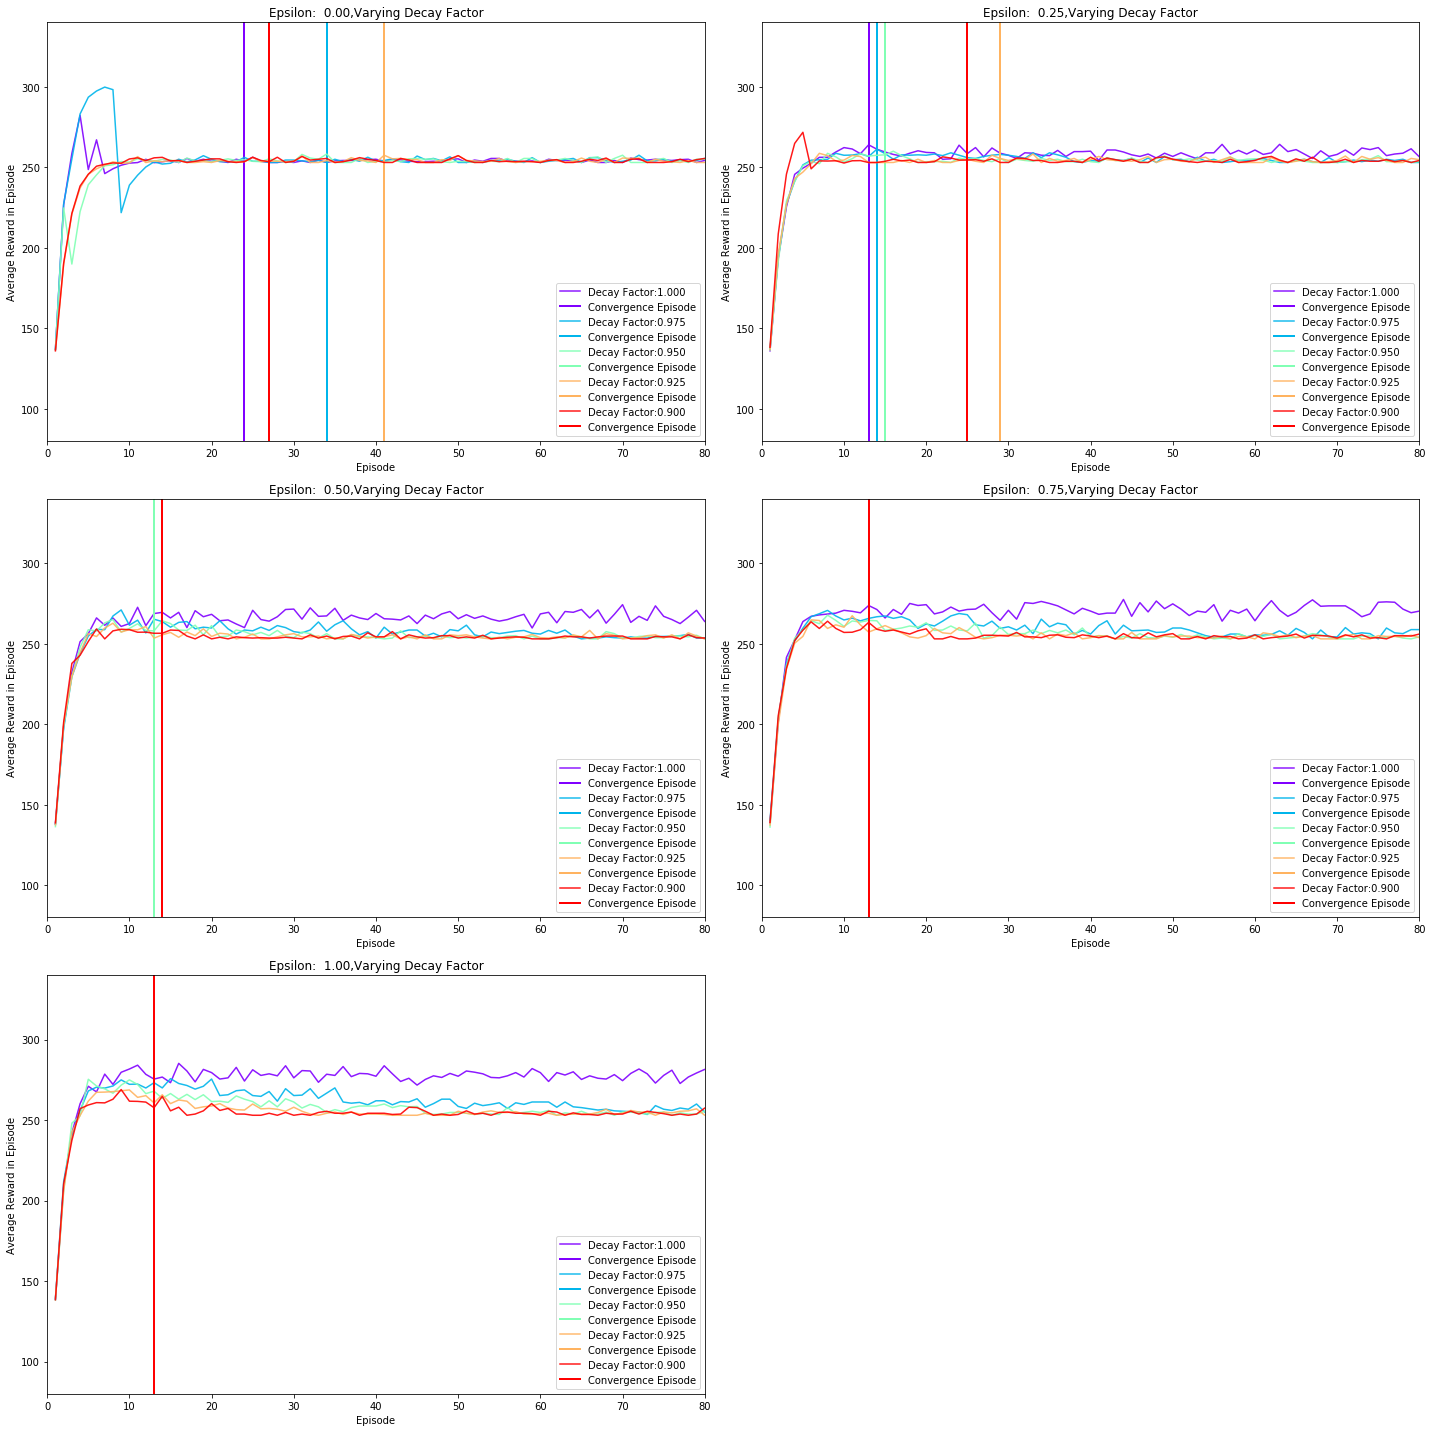

In [44]:
import matplotlib.cm as cm
fig = plt.figure(figsize = (20,20))
for e in range (0,len(Qscore_np)):
    ax = fig.add_subplot(len(Qscore_np)/2+1, len(Qscore_np)/2,e+1)
    colour = iter(cm.rainbow(np.linspace(0,1,len(Qscore_np))))
    for d in range(0,len(Qscore_np)):
        c = next(colour)
        Xepisodes = np.linspace(1,len(Qscore_np[d][e]),len(Qscore_np[d][e]),endpoint = True)
        row = e* (epsilonDecay_rangeSize)+d
        lineQ = ax.plot(Xepisodes,Qscore_np[d][e],alpha = 0.9,c=c,
                       linewidth = 1.5,label = 'Decay Factor:%0.3f'%(1-(epsilonDecay_range[d]/50)))
        plotEpisode_converge = int(covergenceCount_np[row][2])
        conv_points_y = np.linspace(0, 400, 400, endpoint=True)
        conv_points_x = [plotEpisode_converge] * 400 
        convLine = ax.plot(conv_points_x,conv_points_y,label = 'Convergence Episode',c = c,
                          linewidth = 2,alpha = 1)
        ax.legend(loc = 4)
        ax.set_title('Epsilon:  %.2f,Varying Decay Factor' %float((epsilonDecay_range[e])/5))
        ax.set_xlabel('Episode')
        ax.set_ylabel('Average Reward in Episode')
        ax.set_ylim(80,340)
        ax.set_xlim(0,80)
        
        
plt.tight_layout()
plt.show()
        


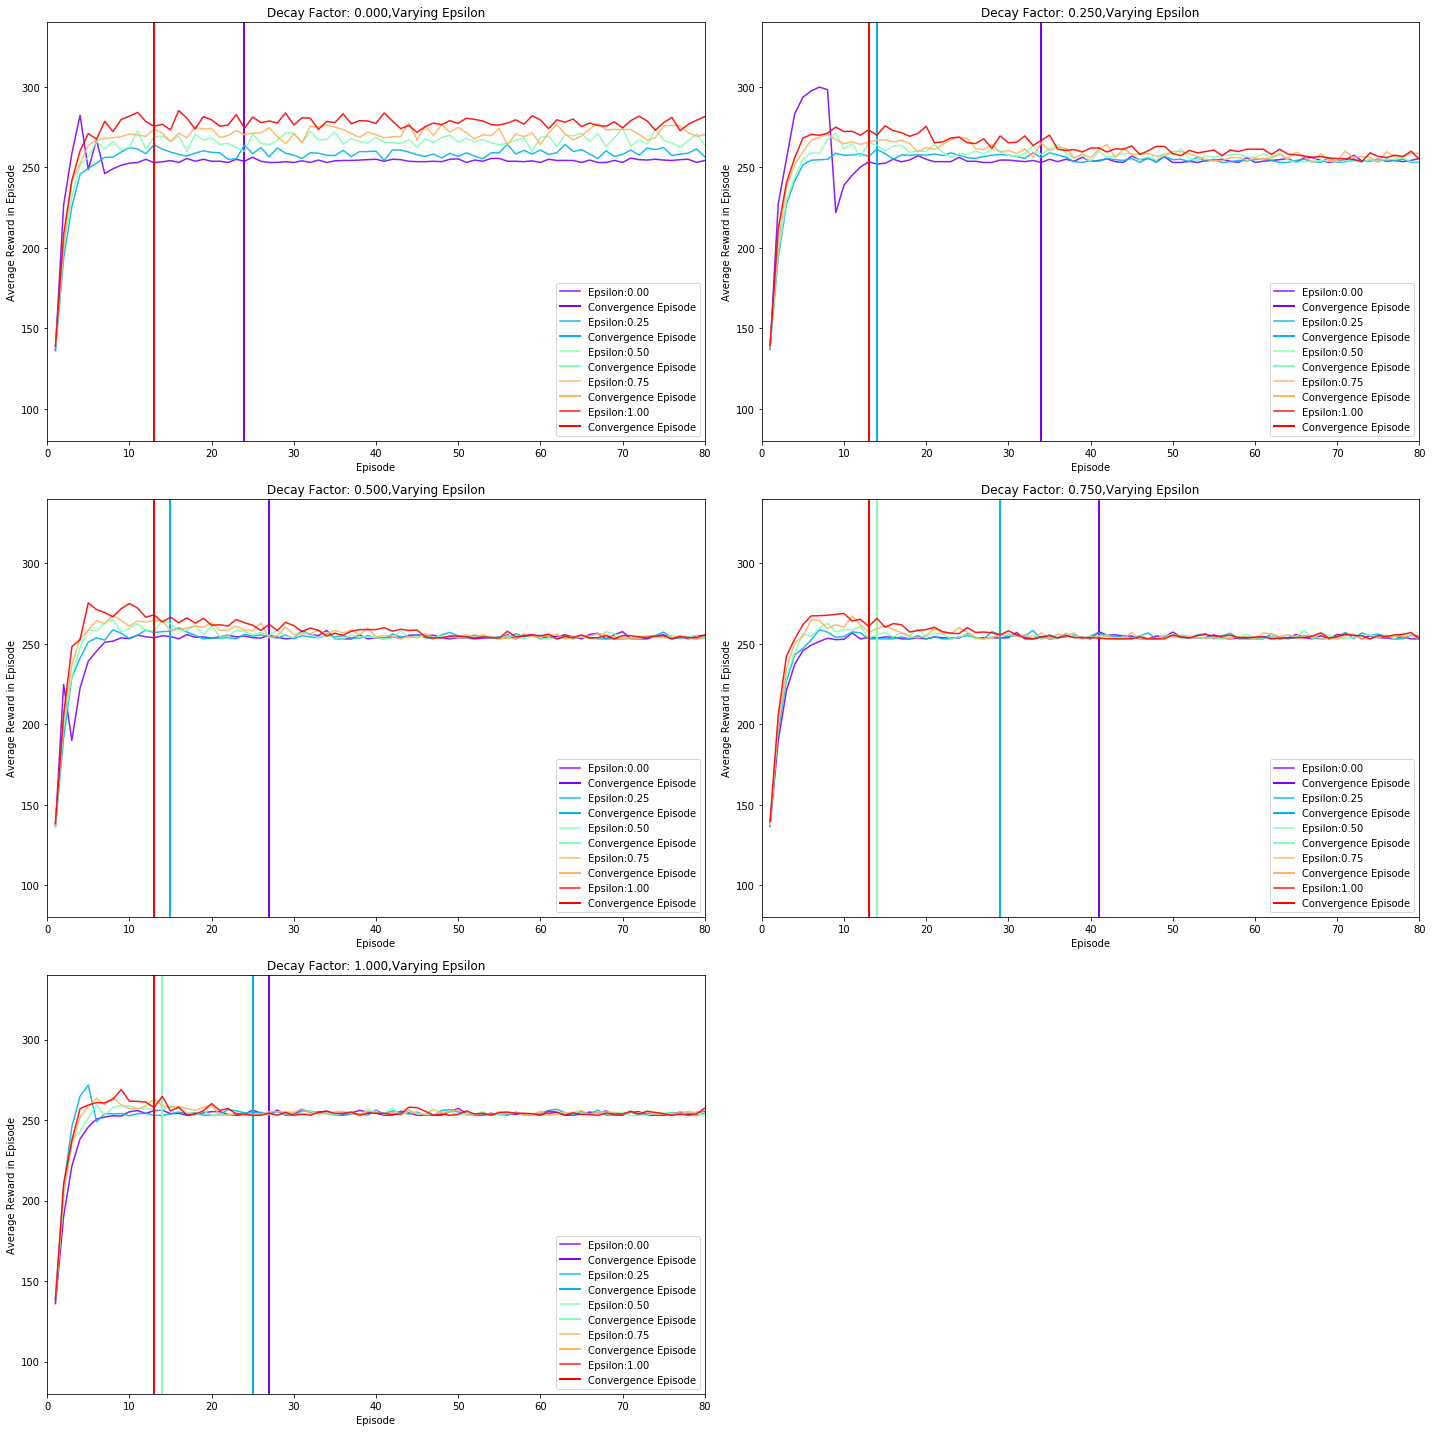

In [45]:
df_algorithm_convergence_count = pd.DataFrame(covergenceCount_np)
fig = plt.figure(figsize = (20,20))
for d in range (0,len(Qscore_np)):
    ax = fig.add_subplot(len(Qscore_np)/2+1, len(Qscore_np)/2,d+1)
    colour = iter(cm.rainbow(np.linspace(0,1,len(Qscore_np))))
    for e in range(0,len(Qscore_np)):
        c = next(colour)
        Xepisodes = np.linspace(1,len(Qscore_np[d][e]),len(Qscore_np[d][e]),endpoint = True)
        row = e* (epsilonDecay_rangeSize)+d
        lineQ1 = ax.plot(Xepisodes,Qscore_np[d][e],alpha = 0.9,c=c,
                       linewidth = 1.5,label = 'Epsilon:%0.2f'%(epsilonDecay_range[e]/5))
        plotEpisode_converge = int(covergenceCount_np[row][2])
        conv_points_y = np.linspace(0, 400, 400, endpoint=True)
        conv_points_x = [plotEpisode_converge] * 400 
        convLine = ax.plot(conv_points_x,conv_points_y,label = 'Convergence Episode',c = c,
                          linewidth = 2,alpha = 1)
        ax.legend(loc = 4)
        ax.set_title('Decay Factor: %.3f,Varying Epsilon' %((epsilonDecay_range[d])/5))
        ax.set_xlabel('Episode')
        ax.set_ylabel('Average Reward in Episode')
        ax.set_ylim(80,340)
        ax.set_xlim(0,80)
        
        
plt.tight_layout()
plt.show()

In [50]:
df_algorithm_convergence_count.columns=['Epsilon','Decay Rate','Episodes to Convergence']
df_algorithm_convergence_count

,Epsilon,Decay Rate,Episodes to Convergence
0,0.000,0.00,24.0
1,0.025,0.25,34.0
2,0.050,0.50,27.0
3,0.075,0.75,41.0
4,0.100,1.00,27.0
5,0.000,0.00,13.0
6,0.025,0.25,14.0
7,0.050,0.50,15.0
8,0.075,0.75,29.0
9,0.100,1.00,25.0


**Variation of learning rate and constant decay factor Grid Search**

In [52]:
#Same Process different vatiables
greedy_epsilon = 0.5
greedy_epsilon_rate = 0.15
convergence_param = 15 #converged if old and new Q stayed the same after 15 episodes
#------------------->
alpha_rangeSize = 5
alpha_range = np.linspace(0,alpha_rangeSize,alpha_rangeSize)
#------------------->
episodeQ_store = [] #store episode rewards
maximumEpisode_count = 200

#----Array for number of episode---->
covergenceCount_np = np.zeros(shape = (alpha_rangeSize**2,3))
#----Array for Q-scores until convergence--->
Qscore_np = [[[] for j in range(alpha_rangeSize)] for i in range(alpha_rangeSize)]
#-------->
episodeCount = []
ga = 0
maximumEpisode_count = 200
#----Grid Search---->
for discount_factor in alpha_range:
    discount_factor = discount_factor/5
    al = 0
    for learning_rate in alpha_range:
        learning_rate = learning_rate/5
        [Qmatrix_old,Qmatrix_new,startLocation,currentState,algorithm_convergence,
convergence,episode] = variableReset()
        greedy_epsilon = 0.5
        rewardMatrix_learning = [0]*reward_mat
        convergenceEpisode = 0
        convergenceEpisode_store = []
        Qmatrix_new_sum_store = []
        first = True
        episodeQ_store = []
        print('Testing Discount Factor',discount_factor, 'Learning Rate is',learning_rate)
        while episode <= maximumEpisode_count-1:
            episodeQvalue_trial_store = []
            for t in range(1,test_samples+1):
                episodeQ_value = Episodefunc(convergence, currentState, Qmatrix_old, Qmatrix_new,greedy_epsilon, learning_rate, discount_factor)
                episodeQvalue_trial_store.append(episodeQ_value)
            episodeQvalue_mean = np.mean(episodeQvalue_trial_store)
            Qmatrix_new_sum_store.append(round(np.sum(Qmatrix_new),1))
    #-----Update Q score for the episode---->
            episodeQ_store.append(episodeQvalue_mean)
            episodemax_Q = max(episodeQ_store)
            greedy_epsilon = greedy_epsilon *(1-greedy_epsilon_rate)
            #----> Same Process
            if greedy_epsilon < 0:
                greedy_epsilon = 0
    
    #----All the psooible paths were explored---->
            if np.count_nonzero(reward_mat) == np.count_nonzero(Qmatrix_old):
                if np.array_equiv(np.round(Qmatrix_new,decimals = 4), np.round(Qmatrix_old, decimals = 4)):
                    convergenceEpisode = episode
                    convergenceEpisode_store.append(convergenceEpisode)
                else:  #----checking the Q matrix is equal to previous episode---->
                    convergenceEpisode_store.append(0)
            else:
                convergenceEpisode_store.append(0)
    #---- Update Old Q with the new one for next iteration---->
            np.copyto(Qmatrix_old,Qmatrix_new)
            episode +=1
            if episode>= convergence_param and episode>=minimumExplore_factor:
                if Qmatrix_new_sum_store[episode-1] == Qmatrix_new_sum_store[episode-convergence_param]:
                    if first == True:
                        convergenceEpisode = episode-convergence_param
                
                        print('The Agent converged in %d episodes' %convergenceEpisode)
                        row = ga*(alpha_rangeSize)+al
                        covergenceCount_np[row][2] = convergenceEpisode
                        first = False
            else:
                convergenceEpisode = 0 
            row = ga * (epsilonDecay_rangeSize)+al
            covergenceCount_np[row][0] = learning_rate
            covergenceCount_np[row][1] = discount_factor
            Qscore_np[al][ga] = episodeQ_store
        al+=1
    ga+=1
            
        
           

Testing Discount Factor 0.0 Learning Rate is 0.0
The Agent converged in 0 episodes
Testing Discount Factor 0.0 Learning Rate is 0.25
The Agent converged in 66 episodes
Testing Discount Factor 0.0 Learning Rate is 0.5
The Agent converged in 20 episodes
Testing Discount Factor 0.0 Learning Rate is 0.75
The Agent converged in 7 episodes
Testing Discount Factor 0.0 Learning Rate is 1.0
The Agent converged in 0 episodes
Testing Discount Factor 0.25 Learning Rate is 0.0
The Agent converged in 0 episodes
Testing Discount Factor 0.25 Learning Rate is 0.25
The Agent converged in 62 episodes
Testing Discount Factor 0.25 Learning Rate is 0.5
The Agent converged in 17 episodes
Testing Discount Factor 0.25 Learning Rate is 0.75
The Agent converged in 7 episodes
Testing Discount Factor 0.25 Learning Rate is 1.0
The Agent converged in 0 episodes
Testing Discount Factor 0.5 Learning Rate is 0.0
The Agent converged in 0 episodes
Testing Discount Factor 0.5 Learning Rate is 0.25
The Agent converged in 5

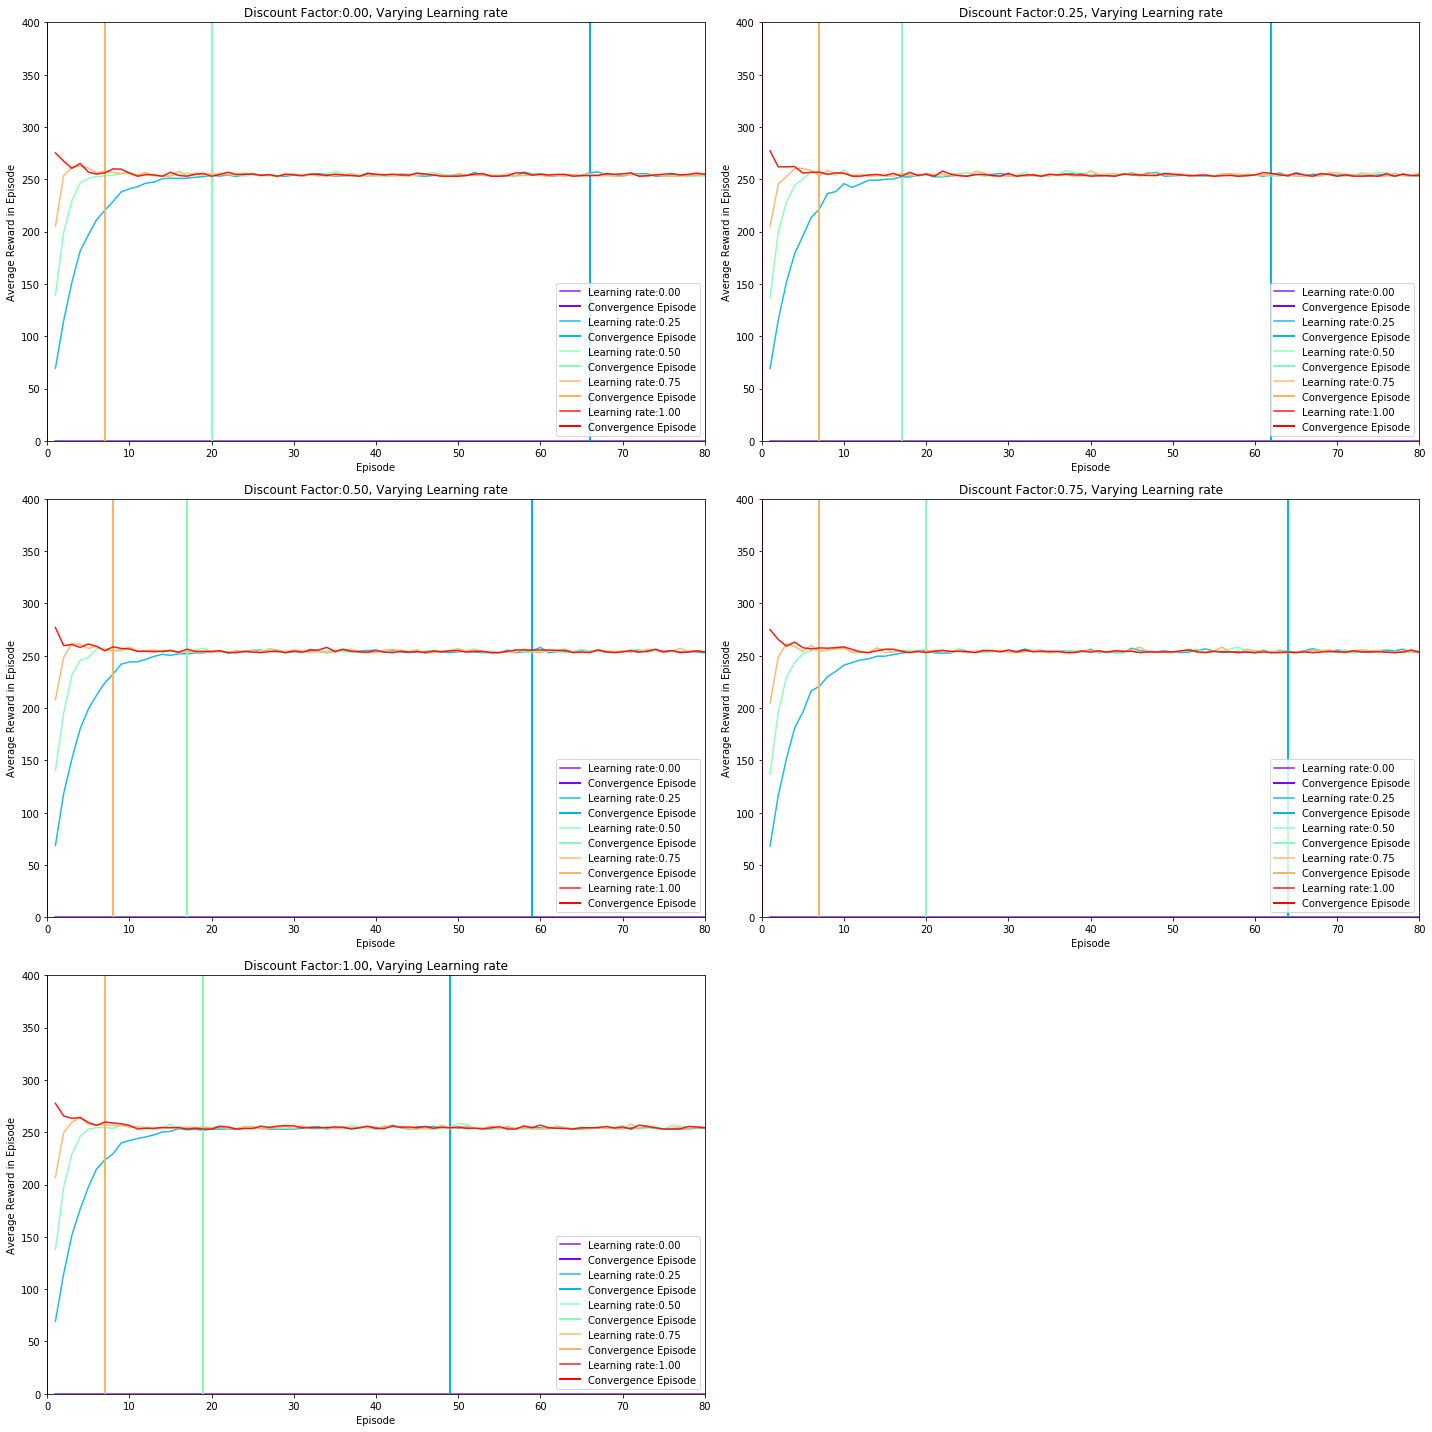

In [56]:
fig = plt.figure(figsize = (20,20))
for ga in range (0,len(Qscore_np)):
    ax = fig.add_subplot(len(Qscore_np)/2+1, len(Qscore_np)/2,ga+1)
    colour = iter(cm.rainbow(np.linspace(0,1,len(Qscore_np))))
    for al in range(0,len(Qscore_np)):
        c = next(colour)
        Xepisodes = np.linspace(1,len(Qscore_np[al][ga]),len(Qscore_np[al][ga]),endpoint = True)
        row = ga* (alpha_rangeSize)+al
        lineQ = ax.plot(Xepisodes,Qscore_np[al][ga],alpha = 0.9,c=c,
                       linewidth = 1.5,label = 'Learning rate:%0.2f'%(alpha_range[al]/5))
        plotEpisode_converge = int(covergenceCount_np[row][2])
        conv_points_y = np.linspace(0, 400, 400, endpoint=True)
        conv_points_x = [plotEpisode_converge] * 400 
        convLine = ax.plot(conv_points_x,conv_points_y,label = 'Convergence Episode',c = c,
                          linewidth = 2,alpha = 1)
        ax.legend(loc = 4)
        ax.set_title('Discount Factor:%0.2f, Varying Learning rate' % (alpha_range[ga]/5))
        ax.set_xlabel('Episode')
        ax.set_ylabel('Average Reward in Episode')
        ax.set_ylim(0,400)
        ax.set_xlim(0,80)
        
        
plt.tight_layout()
plt.show()

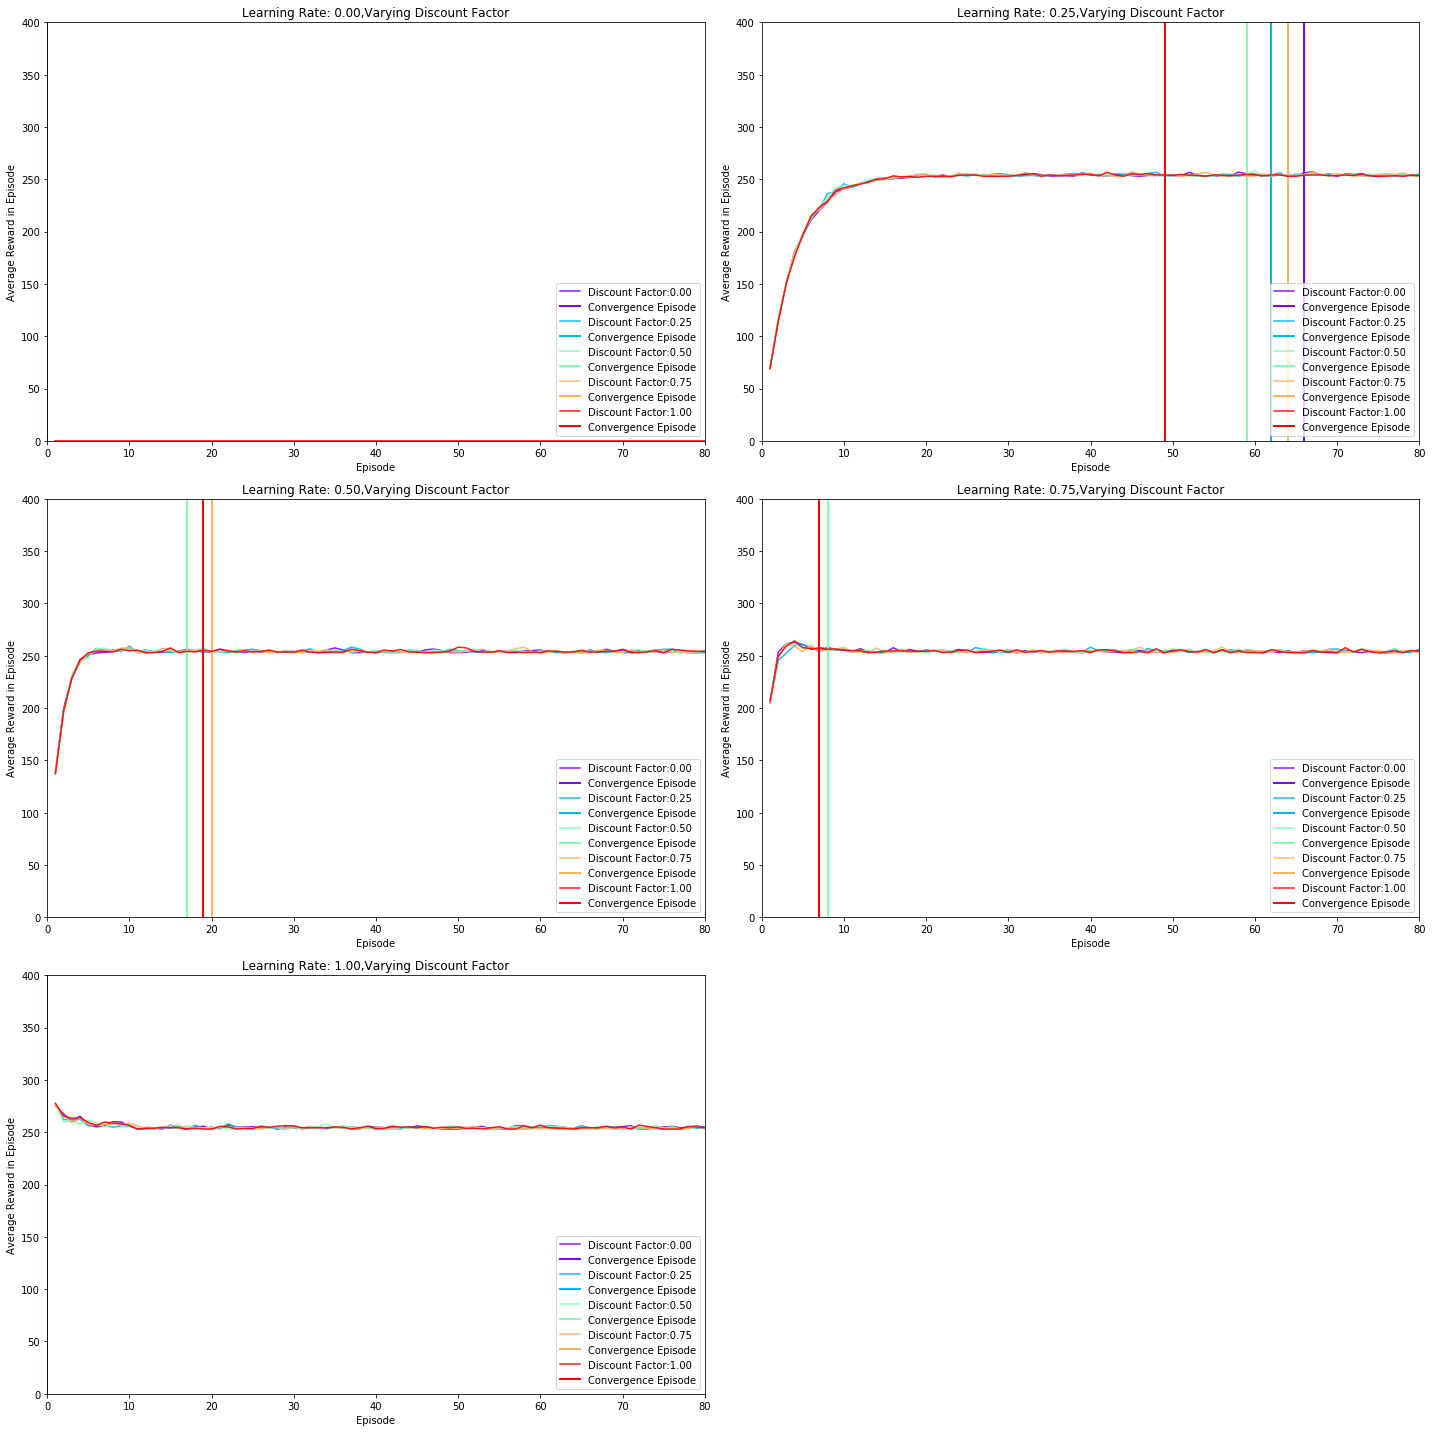

In [57]:
#Same Process in reverse
fig = plt.figure(figsize = (20,20))
for al in range (0,len(Qscore_np)):
    ax = fig.add_subplot(len(Qscore_np)/2+1, len(Qscore_np)/2,al+1)
    colour = iter(cm.rainbow(np.linspace(0,1,len(Qscore_np))))
    for ga in range(0,len(Qscore_np)):
        c = next(colour)
        Xepisodes = np.linspace(1,len(Qscore_np[al][ga]),len(Qscore_np[al][ga]),endpoint = True)
        row = ga* (alpha_rangeSize)+al
        lineQ1 = ax.plot(Xepisodes,Qscore_np[al][ga],alpha = 0.9,c=c,
                       linewidth = 1.5,label = 'Discount Factor:%0.2f'%(alpha_range[ga]/5))
        plotEpisode_converge = int(covergenceCount_np[row][2])
        conv_points_y = np.linspace(0, 400, 400, endpoint=True)
        conv_points_x = [plotEpisode_converge] * 400 
        convLine = ax.plot(conv_points_x,conv_points_y,label = 'Convergence Episode',c = c,
                          linewidth = 2,alpha = 1)
        ax.legend(loc = 4)
        ax.set_title('Learning Rate: %0.2f,Varying Discount Factor' %((alpha_range[al])/5))
        ax.set_xlabel('Episode')
        ax.set_ylabel('Average Reward in Episode')
        ax.set_ylim(0,400)
        ax.set_xlim(0,80)
        
        
plt.tight_layout()
plt.show()